In [34]:
# 1. Define the raw Google Matrix, G

import numpy as np
from numpy import linalg as LA

G = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])


In [35]:
eig_val, eig_vec = LA.eig(G.T)
print(eig_val)

[ 0.        +0.j          0.99057675+0.j          0.54352322+0.20239006j
  0.54352322-0.20239006j -0.11200556+0.53180378j -0.11200556-0.53180378j
 -0.47778499+0.45864795j -0.47778499-0.45864795j -0.53254921+0.j
  0.08742385+0.j         -0.22645837+0.07939335j -0.22645837-0.07939335j]


In [38]:

# 2. Fix dangling nodes (rows with all zeros), and normalize
row_sum = G.sum(axis = 1)
dangling_nodes = row_sum == 0
N = len(G)
G[dangling_nodes, :] = 1 / N

# Normalize G to ensure all rows sum to 1
G = G / G.sum(axis=1, keepdims=True)
eig_val, eig_vec = LA.eig(G.T)
print(eig_val)


[ 1.        +0.j          0.54660437+0.19136315j  0.54660437-0.19136315j
 -0.47664054+0.4567335j  -0.47664054-0.4567335j  -0.1144791 +0.53082685j
 -0.1144791 -0.53082685j -0.53413468+0.j          0.23122782+0.j
 -0.06069464+0.j         -0.23201731+0.07663249j -0.23201731-0.07663249j]


In [33]:
# 3. Power method to find the principal eigenvector (PageRank vector)
def power_method(G, eps=1e-6, max_iter=100):
    n = G.shape[0]
    pi = np.ones(n) / n
    for i in range(max_iter):
        pi_new = G.T @ pi
        if np.linalg.norm(pi_new - pi, 1) < eps:
            break
        pi = pi_new
    return pi / np.sum(pi)

pi = power_method(G)
print(pi)


[0.06982991 0.06982992 0.06803934 0.13697408 0.06982984 0.0537153
 0.17547003 0.03581026 0.12712615 0.01074305 0.00805729 0.17457483]


In [39]:

# 4. Construct the modified Google matrix with teleportation
alpha = 0.85
E = np.ones((n, n)) / n
G_tilde = alpha * G + (1 - alpha) * E


In [40]:
# 5. Power method on G_tilde
pi_tilde = power_method(G_tilde)
print(pi_tilde)

[0.07158147 0.07325076 0.06650948 0.12799415 0.07816064 0.05894977
 0.14679015 0.04778031 0.12162382 0.02911213 0.02268477 0.15556255]


In [8]:

# 6. Keyword data
keywords = [
    ["Apples", "Bananas", "Broccoli", "Cabbage", "Kumquats", "Strawberries"],                # Page A,0
    ["Oranges", "Plums", "Coconuts", "Kumquats", "Blueberries", "Cherries", "Strawberries"], # Page B,1
    ["Lettuce", "Spinach", "Bananas", "Blackberries", "Peas", "Strawberries"],               # Page C,2
    ["Oranges", "Onions", "Celery", "Kumquats", "Corn", "Radishes"],                         # Page D,3
    ["Pineapples", "Plums", "Corn", "Cherries", "Broccoli", "Peas", "Strawberries"],         # Page E,4
    ["Lettuce", "Onions", "Coconuts", "Spinach", "Peas", "Strawberries"],                    # Page F,5
    ["Apples", "Onions", "Broccoli", "Corn", "Cabbage", "Peas"],                             # Page G,6
    ["Plums", "Blueberries", "Raspberries", "Blackberries", "Strawberries"],                 # Page H,7
    ["Apples", "Cucumbers", "Carrots", "Spinach", "Corn", "Black Beans", "Cabbage"],         # Page I,8
    ["Mushrooms", "Carrots", "Lettuce", "Radishes", "Peppers", "Broccoli", "Spinach"],       # Page J,9
    ["Carrots", "Lettuce", "Celery", "Onions", "Cabbage", "Peas"],                           # Page K,10
    ["Broccoli", "Cabbage", "Carrots", "Spinach", "Corn", "Peas"]                            # Page L,11
]

# User query
query = ["Apples", "Bananas", "Broccoli", "Blueberries", "Blackberries", "Black Beans", "Cabbage", "Carrots", "Celery", "Cherries", "Coconuts", "Corn", "Cucumbers", "Kumquats", "Lettuce", "Mushrooms", "Onions", "Oranges", "Peas", "Peppers", "Pineapples", "Plums", "Radishes", "Raspberries", "Spinach", "Strawberries"]


In [15]:

# 7. Construct Term-Document Matrix T
terms = list(set([term for sublist in keywords for term in sublist]))  # Unique terms
T = np.zeros((len(terms), n))
for j in range(n):
    for term in keywords[j]:
        i = terms.index(term)
        T[i, j] = 1
print(T)

[[0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.

In [10]:

# 8. Create query vector q
q = np.zeros(len(terms))
for term in query:
    if term in terms:
        q[terms.index(term)] = 1


In [11]:

# 9. Compute dᵀ = qᵀ T
d = q.T @ T


In [12]:

# 10. Rank webpages by importance and responsiveness
responsive_pages = np.argsort(-d)
importance_ranking = np.argsort(-pi_tilde)


In [13]:

# 11. Final ranking of responsive webpages based on importance
ranked_responsive_pages = [page for page in importance_ranking if d[page] > 0]

# Output results
print("Google Matrix (G):")
print(G)
print("\nPageRank Vector (pi):")
print(pi)
print("\nModified Google Matrix (G_tilde):")
print(G_tilde)
print("\nModified PageRank Vector (pi_tilde):")
print(pi_tilde)
print("\nQuery Vector (q):")
print(q)
print("\nTerm-Document Matrix (T):")
print(T)
print("\nResponsiveness Vector (d):")
print(d)
print("\nFinal Ranking of Responsive Webpages:")
print(ranked_responsive_pages)

Google Matrix (G):
[[0.         0.5        0.         0.         0.5        0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.33333333
  0.         0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.         0.         0.5        0.         0.         0.        ]
 [0.         0.         0.25       0.25       0.         0.
  0.         0.         0.25       0.         0.         0.25      ]
 [0.         0.         0.         0.         0.2        0.2
  0.     

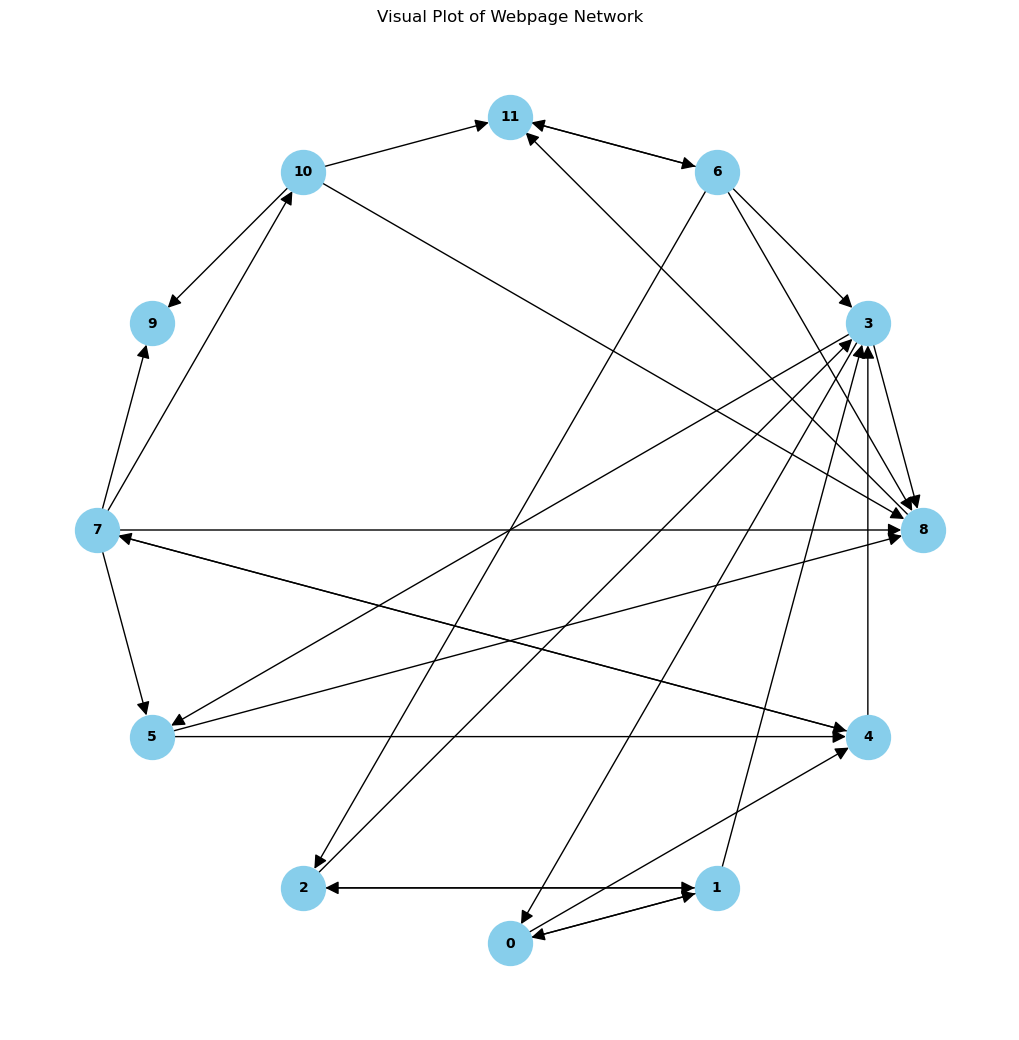

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
G = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])

# Create a directed graph from the adjacency matrix
num_nodes = G.shape[0]
G_directed = nx.DiGraph(G)

# Final ranking of the webpages
ranking = [11, 6, 3, 8, 4, 1, 0, 2, 5, 7, 9, 10]
pos = {}
radius = 7
for i, node in enumerate(ranking):
    angle = 2 * np.pi * i / num_nodes
    x = radius * np.sin(angle)
    y = radius * np.cos(angle)
    pos[node] = (x, y)

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G_directed, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, arrowsize=20)
plt.title('Visual Plot of Webpage Network')
plt.show()